In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
data =pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [25]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [35]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [36]:
# Renaming columns ID# Award?
data = data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)

In [37]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [38]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [39]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


# Hierarchical

In [40]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [41]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])

In [42]:
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


<Figure size 1440x720 with 0 Axes>

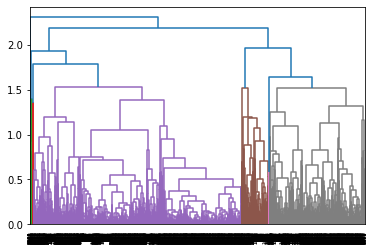

<Figure size 1440x720 with 0 Axes>

In [43]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.figure(figsize=(20,10))


In [44]:
# create clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')  
cluster

AgglomerativeClustering(linkage='single', n_clusters=5)

In [45]:
cluster.fit_predict(df_norm)
     

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
# save clusters for chart
y_cluster = cluster.fit_predict(df_norm)

In [48]:
data['h_clusterid'] = y_cluster 
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [51]:
data.groupby(["h_clusterid"])["ID"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID, dtype: object

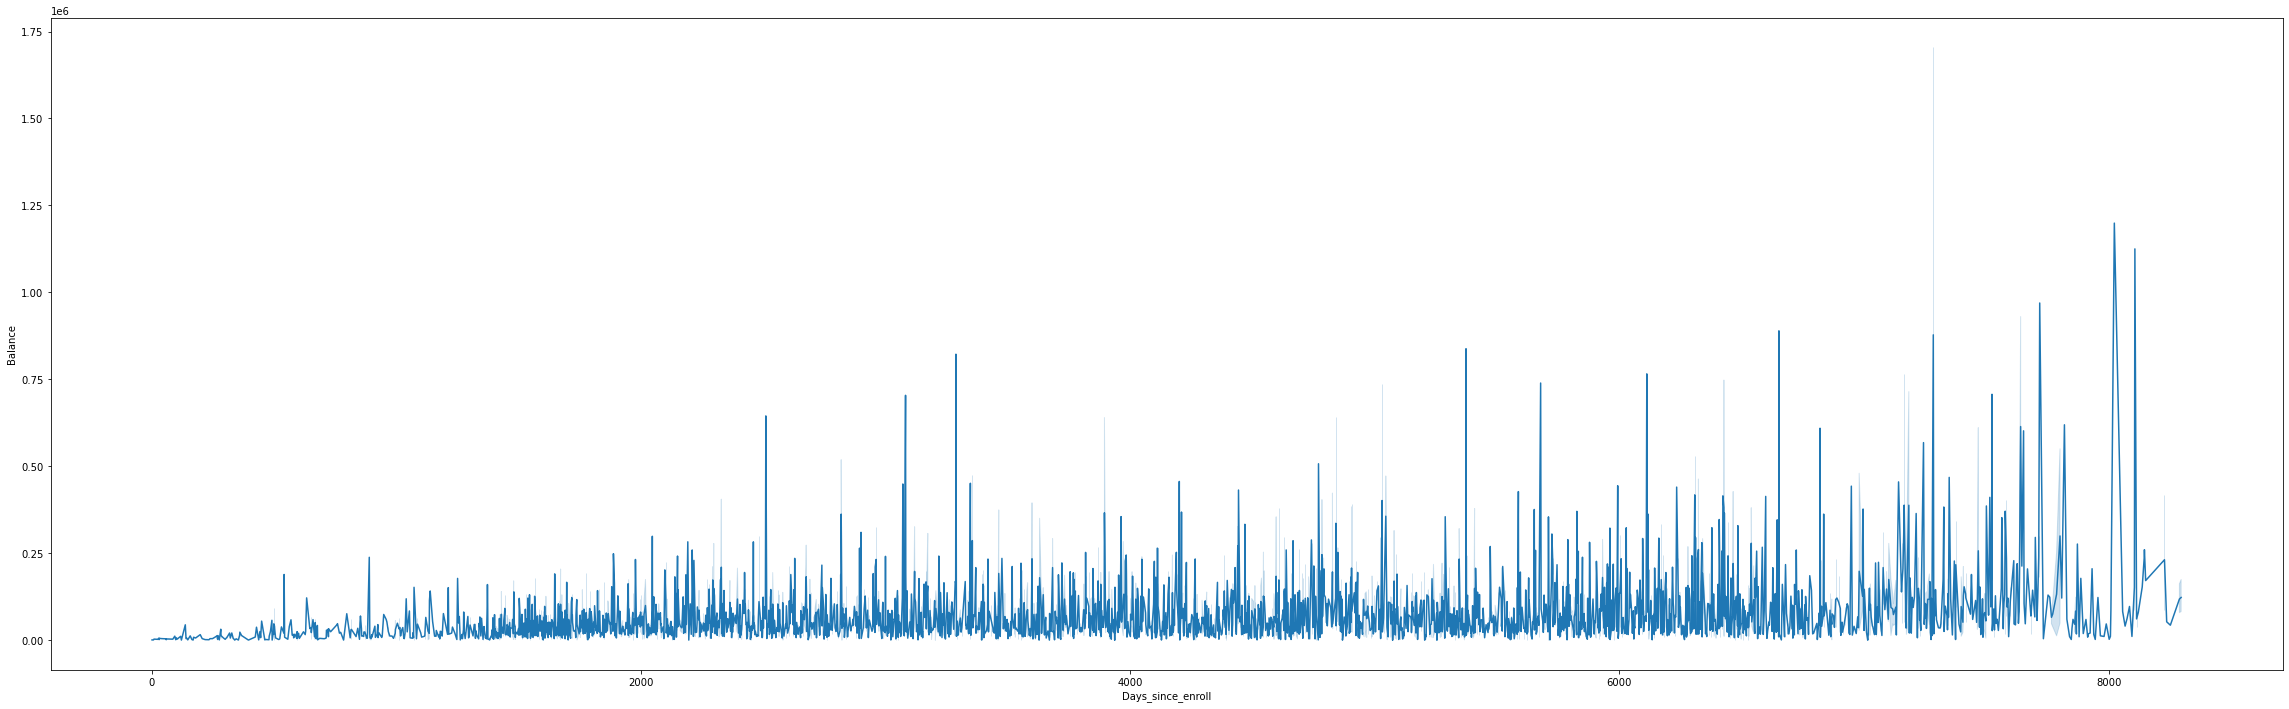

In [52]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)

In [53]:
data1 = data.drop('ID', axis = 1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [55]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [56]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data)
print(scaler2_df)

[[0.00000000e+00 1.65077268e-02 0.00000000e+00 ... 8.43742464e-01
  0.00000000e+00 0.00000000e+00]
 [2.48756219e-04 1.12878760e-02 0.00000000e+00 ... 8.39884254e-01
  0.00000000e+00 0.00000000e+00]
 [4.97512438e-04 2.42568502e-02 0.00000000e+00 ... 8.47841813e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99502488e-01 4.31694976e-02 0.00000000e+00 ... 1.68796721e-01
  1.00000000e+00 2.50000000e-01]
 [9.99751244e-01 3.22018866e-02 0.00000000e+00 ... 1.68676151e-01
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.76908304e-03 0.00000000e+00 ... 1.68314444e-01
  0.00000000e+00 0.00000000e+00]]


[[-1.73512503e+00 -4.51140783e-01 -1.86298687e-01 ...  1.39545434e+00
  -7.66919299e-01 -7.61281465e-01]
 [-1.73426342e+00 -5.39456874e-01 -1.86298687e-01 ...  1.37995704e+00
  -7.66919299e-01 -7.61281465e-01]
 [-1.73340181e+00 -3.20031232e-01 -1.86298687e-01 ...  1.41192021e+00
  -7.66919299e-01 -7.61281465e-01]
 ...
 [ 1.72682006e+00 -4.29480975e-05 -1.86298687e-01 ... -1.31560393e+00
   1.303

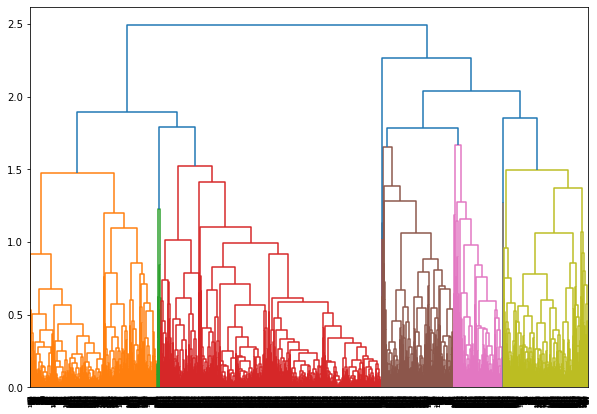

In [57]:
# Create Dendrograms for scaler1_daf
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

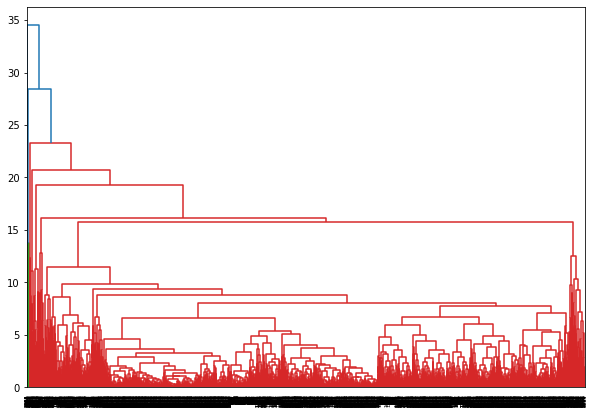

In [58]:
# Create Dendrograms for scaler2_daf
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [59]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [60]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

4    884
0    856
2    838
1    796
3    625
Name: clustersid, dtype: int64

In [61]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

In [62]:
# silhouette_score of Agglomerative  Clustering
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3594568421134346

In [63]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

0    2432
1    1460
4      46
2      43
3      18
Name: clustersid, dtype: int64

In [64]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
data['clustersid_s2']=H_clusters.labels_
data1['clustersid_s2']=H_clusters.labels_

In [65]:
# silhouette_score of AgglomerativeClustering
sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3239679961935677

# K-MEANS Clustering# 

In [66]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [67]:

minmaxscaler = MinMaxScaler()
stdscaler= StandardScaler()
     

In [68]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         1.         0.        ]
 [0.01128788 0.         0.         ... 0.         1.         0.        ]
 [0.02425685 0.         0.         ... 0.         1.         0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.25       0.         0.25      ]
 [0.03220189 0.         0.         ... 0.         0.5        0.        ]
 [0.00176908 0.         0.         ... 0.         0.5        0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.61281465e-01
   1.40166282e+00 -6.77450303e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.61281465e-01
   1.40166282e+00 -6.77450303e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.61281465e-01
   1.40166282e+00 -6.77450303e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.28603836e+00
  -1.36192630e+00  8.41116828e-01]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.61281465e-01
   1.98682639e-02 -6.77450303e-01]
 [-7.00507951e-01 -1.862

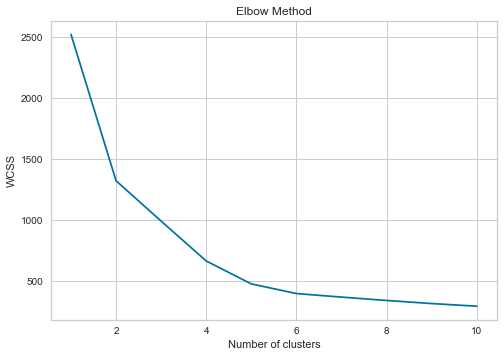

In [69]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

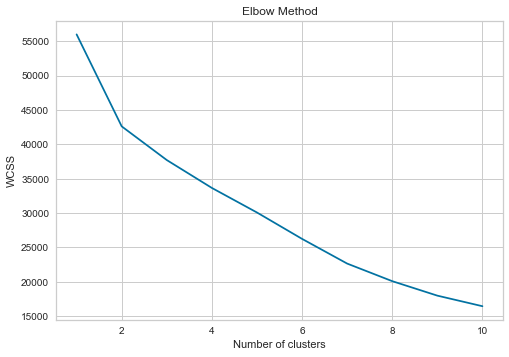

In [70]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
#Build Cluster algorithm

# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.5485949732752587
Silhouette Score for data normalized by StandardScaler:  0.2915966826243231


In [72]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [73]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

0    902
4    883
2    817
3    733
1    664
Name: clusterid_Kmeans, dtype: int64

In [74]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,32715.343681,102.521064,1.067627,1.001109,1.007761,3184.016630,6.208426,262.276053,0.732816,1802.179601,0.0,0.000000,1.932373,0.031042
1,1,119002.347892,152.673193,3.930723,1.001506,1.036145,47871.882530,20.182229,715.197289,2.153614,5639.284639,1.0,1.004518,2.823795,1.067771
2,2,79214.210526,311.329253,1.630355,1.026928,1.003672,13490.806610,12.206854,973.155447,2.962056,3800.773562,1.0,1.003672,0.000000,1.127295
3,3,111157.054570,75.950887,3.335607,1.001364,1.019100,28008.095498,16.753070,208.130969,0.579809,4562.000000,0.0,0.000000,1.000000,0.072306
4,4,44857.054360,82.035108,1.003398,1.037373,1.001133,2662.971687,5.823330,204.610419,0.630804,5267.146093,0.0,0.000000,4.000000,0.082673


# DBSCAN

In [75]:
from sklearn.cluster import DBSCAN

In [76]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 1.         0.         1.        ]
 [0.01128788 0.         0.         ... 1.         0.         1.        ]
 [0.02425685 0.         0.         ... 1.         0.         1.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.25       0.5       ]
 [0.03220189 0.         0.         ... 0.5        0.         0.        ]
 [0.00176908 0.         0.         ... 0.5        0.         0.        ]]


In [77]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [78]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [79]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

 0    2516
 1    1480
-1       3
Name: clusterid_DBSCAN, dtype: int64

In [80]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.4195096852851066

In [81]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)
     

 2    1629
 1    1470
 0     883
-1      17
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.47174488654560387


In [82]:
data['clusterid_DBSCAN'] = dbscan1.labels_
data1['clusterid_DBSCAN'] = dbscan1.labels_

In [83]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clustersid_s1,clustersid_s2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,4,0,4,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,4,0,4,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,0,4,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,4,0,4,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,1,1,1


In [84]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clustersid_s1,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,82742.470588,508.411765,2.764706,1.058824,1.647059,66101.176471,34.000000,6637.235294,20.705882,3854.941176,0.647059,0.941176,1.941176,3.529412,0.823529
1,0,44857.054360,82.035108,1.003398,1.037373,1.001133,2662.971687,5.823330,204.610419,0.630804,5267.146093,0.000000,0.000000,4.000000,0.082673,4.000000
2,1,97088.219048,236.114286,2.653741,1.015646,1.015646,28470.440136,15.580272,800.933333,2.429932,4625.216327,1.000000,1.000680,1.261224,1.081633,1.553741
3,2,67892.342541,90.942910,2.088398,1.000614,1.008594,14263.701044,10.910374,226.449969,0.621240,3041.514426,0.000000,0.000000,1.512584,0.037446,1.349908
